In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## By Zscore

In [48]:
ds=[54.97, 48.62, 56.48, 65.23, 47.66, 47.66, 65.79, 57.67, 45.31, 55.43, 45.37, 45.34, 52.42, 30.87, 32.75, 44.38, 39.87, 53.14, 40.92, 35.88, 64.66, 47.74, 50.68, 35.75, 44.56, 51.11, 38.49, 150.00, -50.00, 200.00]

In [51]:
outliers=[]
def detect_outliers(data):
    threshold=2
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        zscore= (i-mean)/std
        if np.abs(zscore)>threshold:
            outliers.append(i)

    return outliers


(array([ 1.,  0.,  0., 16., 11.,  0.,  0.,  0.,  1.,  1.]),
 array([-50., -25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <BarContainer object of 10 artists>)

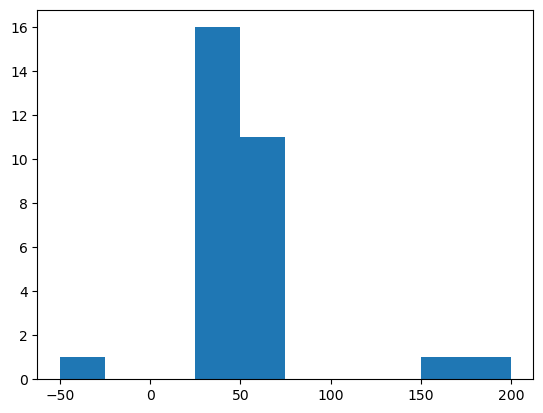

In [18]:
plt.hist(ds)

In [52]:
detect_outliers(ds)


[150.0, -50.0, 200.0]

## By IQR(Inter Quartile Range)

In [53]:
ds=sorted(ds)

In [54]:
ds

[-50.0,
 30.87,
 32.75,
 35.75,
 35.88,
 38.49,
 39.87,
 40.92,
 44.38,
 44.56,
 45.31,
 45.34,
 45.37,
 47.66,
 47.66,
 47.74,
 48.62,
 50.68,
 51.11,
 52.42,
 53.14,
 54.97,
 55.43,
 56.48,
 57.67,
 64.66,
 65.23,
 65.79,
 150.0,
 200.0]

In [68]:
q1,q3=np.percentile(ds,[25,75])

print(q1,q3)

41.785000000000004 55.315


In [69]:
iqr=q3-q1
print(iqr)

13.529999999999994


In [76]:
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
print(lower_fence,upper_fence)

21.490000000000013 75.60999999999999


In [89]:
ds=np.array(ds)
outliers= ds[(ds < lower_fence) | (ds > upper_fence)]
print(outliers)

[-50. 150. 200.]


In [72]:
import seaborn as sns

<Axes: >

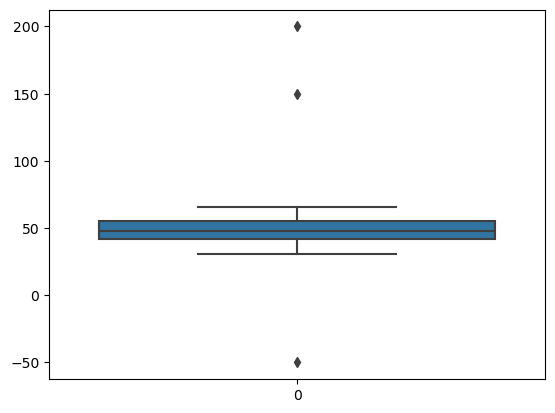

In [73]:
sns.boxplot(ds)